In [2]:
%matplotlib inline
import scipy
from scipy import stats

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

import wbdata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
df = pd.read_csv('wb_data.csv', sep='\t')
print df.head()

  iso_code     country        date    gdp   gini
0       1A  Arab World  2016-01-01  16716  28.96
1       1A  Arab World  2015-01-01  16281  28.96
2       1A  Arab World  2014-01-01  15911  28.96
3       1A  Arab World  2013-01-01  15526  28.96
4       1A  Arab World  2012-01-01  15090  28.96


In [4]:
gdp_gini_subset = df[['iso_code','country','date','gdp', 'gini']]
print gdp_gini_subset.describe()

                 gdp         gini
count    4488.000000  4477.000000
mean    15850.737299    37.643672
std     17948.431646     9.145874
min       408.000000    16.230000
25%      3249.000000    28.960000
50%      9331.000000    35.390000
75%     22999.500000    42.970000
max    140037.000000    64.790000


In [5]:
gdp_bins  = [-0.1, 3249,  22999.5, 140037]
gini_bins = [-0.1, 28.96, 42.97,   100]
group_names = ['Low', 'Average', 'Hight']

In [7]:
gdp_gini_subset['gdp_categories'] = pd.cut(gdp_gini_subset['gdp'], gdp_bins, labels=group_names)
gdp_gini_subset['gini_categories'] = pd.cut(gdp_gini_subset['gini'], gini_bins, labels=group_names)

/usr/lib/python2.7/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


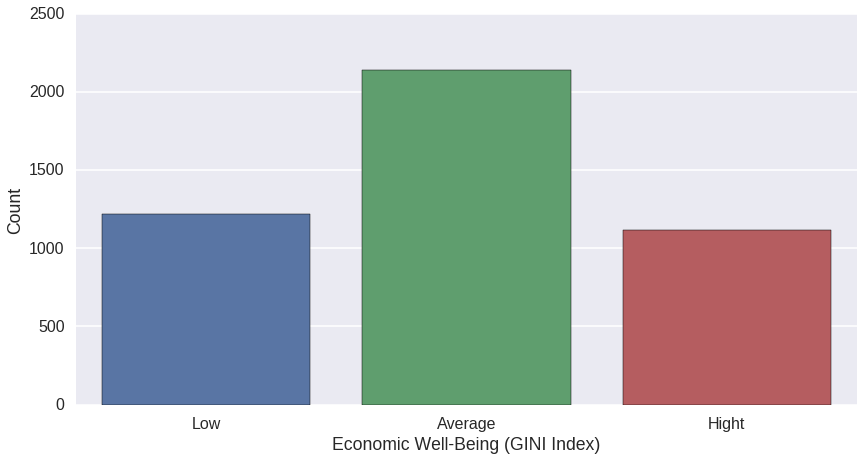

In [8]:

sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=gdp_gini_subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GINI Index)')
plt.show()

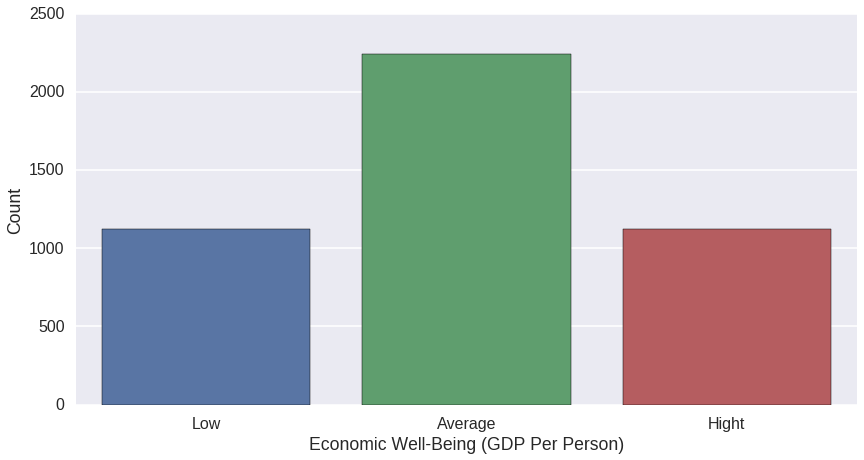

In [9]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=gdp_gini_subset)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

In [ ]:
#print gdp_gini_subset.head()

pisa2012_file='PISA_2012_clean.csv'
pisa12 = pd.read_csv(pisa2012_file)

pisa2015_file='PISA_2015_clean.csv'
pisa15 = pd.read_csv(pisa2015_file)

pisa2008_file='PISA_2008_clean.csv'
pisa08 = pd.read_csv(pisa2008_file)

countries = wbdata.get_country(display=False)
d = dict((x['name'].strip(), x['iso2Code']) for x in countries)

pisa12 = pisa12.assign(iso_code = pisa12.country.map(lambda x: d[x]))
pisa15 = pisa15.assign(iso_code = pisa15.country.map(lambda x: d[x]))
pisa08 = pisa08.assign(iso_code = pisa08.country.map(lambda x: d[x]))

df_pisa_all = pd.concat([pisa08, pisa12, pisa15])
df_pisa_all.sort(['country','iso_code'], inplace=True)

df4 = pd.merge(gdp_gini_subset, df_pisa_all, how='right', on=['iso_code','country','date'])

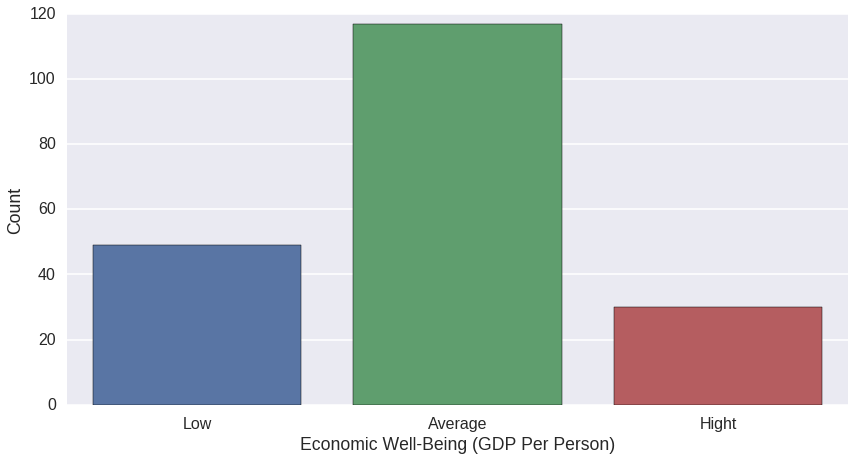

In [11]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gini_categories', data=df4)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


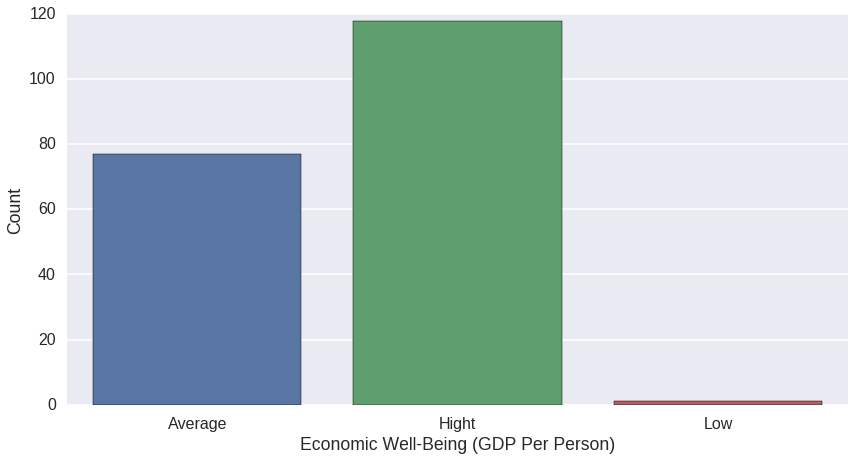

In [10]:
sns.set_context('poster')
plt.figure(figsize=(14, 7))
sns.countplot(x='gdp_categories', data=df4)
plt.ylabel('Count')
plt.xlabel('Economic Well-Being (GDP Per Person)')
plt.show()

# H0 - hypitize that Gini index is not correlated with results in PISA test

*******************GINI ANOVA**********************************


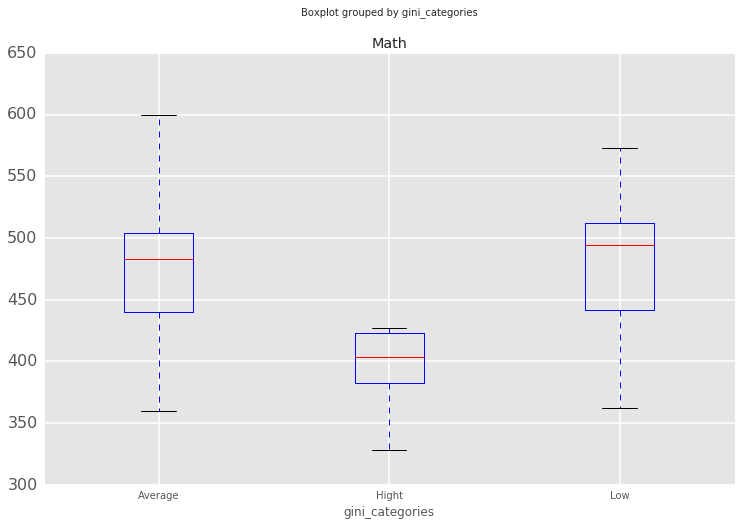

In [14]:
#pd.options.display.mpl_style = 'default'
import matplotlib
matplotlib.style.use('ggplot')
df4.boxplot('Math', by='gini_categories', figsize=(12,8))

In [20]:
groups = df4.groupby("gini_categories").groups
#print groups
#exit(0)
low_gini = df4.loc[df4['gini_categories'] == 'Low'].Math
shapiro_results = scipy.stats.shapiro(low_gini)
#shapiro_results = scipy.stats.shapiro(groups["Low"])
print "*** Low GINI check normal***"
print shapiro_results

#print low_gini
av_gini =  df4.loc[df4['gini_categories'] == 'Average'].Math
shapiro_results = scipy.stats.shapiro(av_gini)
print "*** AVERAGE GINI check normal ***"
print shapiro_results


hi_gini =  df4.loc[df4['gini_categories'] == 'Hight'].Math
shapiro_results = scipy.stats.shapiro(hi_gini)
print "*** HIGHT GINI check normal ***"
print shapiro_results

mod = ols('Math ~ gini_categories', data=df4).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table



*** Low GINI check normal***
(0.9094054698944092, 0.0011308548273518682)
*** AVERAGE GINI check normal ***
(0.9733206033706665, 0.019619692116975784)
*** HIGHT GINI check normal ***
(0.8602246046066284, 0.0010228214086964726)
                        sum_sq   df          F        PR(>F)
gini_categories   82929.669048    2  14.903332  9.576599e-07
Residual         536974.754422  193        NaN           NaN


'\nResult:\n    p value is much higher \n'


# Result:   p value is much higher 

# H0 - hypitize that Gini index is not correlated with results in PISA test

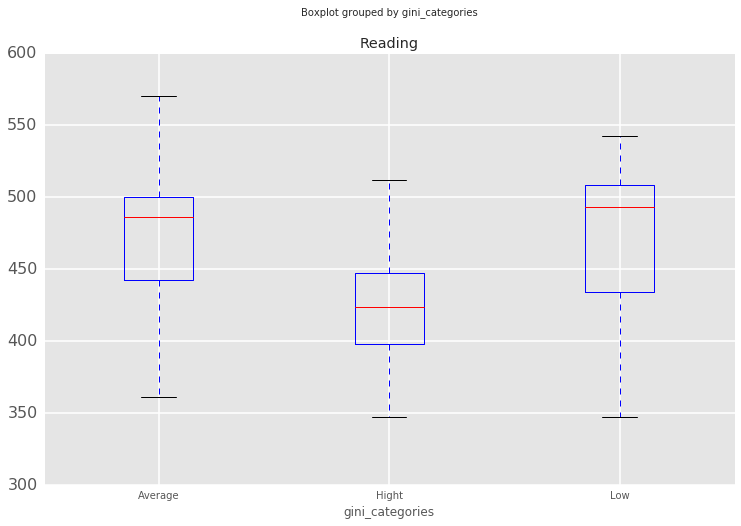

In [21]:
import matplotlib
matplotlib.style.use('ggplot')
df4.boxplot('Reading', by='gini_categories', figsize=(12,8))

In [22]:
groups = df4.groupby("gini_categories").groups
#print groups
#exit(0)
low_gini = df4.loc[df4['gini_categories'] == 'Low'].Reading
shapiro_results = scipy.stats.shapiro(low_gini)
#shapiro_results = scipy.stats.shapiro(groups["Low"])
print "*** Low GINI check normal***"
print shapiro_results

#print low_gini
av_gini =  df4.loc[df4['gini_categories'] == 'Average'].Reading
shapiro_results = scipy.stats.shapiro(av_gini)
print "*** AVERAGE GINI check normal ***"
print shapiro_results


hi_gini =  df4.loc[df4['gini_categories'] == 'Hight'].Reading
shapiro_results = scipy.stats.shapiro(hi_gini)
print "*** HIGHT GINI check normal ***"
print shapiro_results

mod = ols('Reading ~ gini_categories', data=df4).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print aov_table

*** Low GINI check normal***
(0.8943895101547241, 0.0003621618670877069)
*** AVERAGE GINI check normal ***
(0.9355471730232239, 2.7287918783258647e-05)
*** HIGHT GINI check normal ***
(0.932308554649353, 0.05656588822603226)
                        sum_sq   df          F    PR(>F)
gini_categories   53894.085889    2  11.845928  0.000014
Residual         439035.179417  193        NaN       NaN


In [ ]:
'''
H0 - hypitize that GDP index is not correlated with results in PISA test
Can't check cause very few data with low GDP
'''
print "*******************GINI ANOVA**********************************"
'''
low_gdp = df4.loc[df4['gdp_categories'] == 'Low'].Math
shapiro_results = scipy.stats.shapiro(low_gdp)
print "*** Low GDP check normal***"
print shapiro_results

#print low_gini
av_gdp =  df4.loc[df4['gdp_categories'] == 'Average'].Math
shapiro_results = scipy.stats.shapiro(av_gdp)
print "*** AVERAGE GDP check normal ***"
print shapiro_results


hi_gdp =  df4.loc[df4['gdp_categories'] == 'Hight'].Math
shapiro_results = scipy.stats.shapiro(hi_gdp)
print "*** HIGHT GDP check normal ***"
print shapiro_results

f_val, p_val = stats.f_oneway(low_gdp, av_gdp, hi_gdp)

print "One-way ANOVA F =", f_val
print "One-way ANOVA P =", p_val 

print "*************************************************************"
'''

exit(0)

formula = 'Math ~ C(gini_categories)'
model = ols(formula, data=df4).fit()
aov_table = statsmodels.stats.anova.anova_lm(model, typ=2)
print(aov_table)
 